In [1]:
#pip install xlrd 
#!pip install openpyxl

## **Прогнозирование конечных свойств новых материалов (композиционных материалов)**

In [2]:
# Подключение к моему виртуальному диску для считывания данных
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd

####**1. Подготовка данных**


1.1 Загрузка данных

In [3]:
# Загружаем фалы в формат датафрейма
df1 = pd.read_csv('X_bp.csv',decimal=",")                                 #/content/drive/MyDrive/Model/VKR/X_bp.xlsx')

df2 = pd.read_csv('X_nup.csv',decimal=",")                                               #/content/drive/MyDrive/Model/VKR/X_nup.xlsx')

In [4]:
# Объединяем в один датафрейм
df = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)
df.head()

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4,0,5.0,57.0


In [5]:
# Определяем колличество строк и колонок 
df.shape

(1023, 15)

In [6]:
# Проверяем есть ли пропуски
df.isnull().sum().sum()

0

In [7]:
# Получаем информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0_x                          1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
 11  Unnamed: 0_y          

In [8]:
# Получаем информацию о датасете
df.describe(include='all')

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,511.000000,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,511.000000,44.252199,6.899222,57.153929
std,295.458965,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,295.458965,45.015793,2.563467,12.350969
min,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000,0.000000
25%,255.500000,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,255.500000,0.000000,5.080033,49.799212
50%,511.000000,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,511.000000,0.000000,6.916144,57.341920
75%,766.500000,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,766.500000,90.000000,8.586293,64.944961
max,1022.000000,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1022.000000,90.000000,14.440522,103.988901


In [9]:
# Проверяем колличество уникальных значений в каждом столбце
df.nunique()

Unnamed: 0_x                            1023
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Unnamed: 0_y                            1023
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [10]:
#  Удаляем ненужные столбцы
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, errors='ignore')

In [11]:
# Определяем колличество оставшихся данных
df.shape

(1023, 13)

In [12]:
df.sample(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
92,3.552418,1986.552440,818.135194,102.614962,17.751531,256.335930,414.212655,72.513747,2427.726923,277.746898,0,7.016622,48.667644
394,3.378918,1944.606404,894.037188,113.008105,20.087852,250.633767,589.883257,70.191235,2370.078697,210.296112,0,5.312018,73.293925
721,1.922883,2010.937896,837.613821,110.450712,22.109108,173.973907,585.310794,72.759959,2659.565599,143.805111,90,7.768986,67.045308
737,2.498830,2004.101940,631.019390,57.815970,22.739078,243.963944,732.451817,72.601550,1933.740395,231.068894,90,4.496965,57.536611
144,4.874254,1974.917774,23.614603,80.792748,20.621846,365.185471,352.821224,75.219360,1954.964443,293.256748,0,10.128936,50.260097


In [13]:
# Выводим названия оставшихся атрибутов
print(df.columns)

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')


#### 1.2 Первичное преобразование данных

In [14]:
# Новые имена  колонок
new_column_names = {
    'Соотношение матрица-наполнитель': 'Matrix-Filler Ratio',
    'Плотность, кг/м3': 'Density',
    'модуль упругости, ГПа': 'Elastic Modulus',
    'Количество отвердителя, м.%': 'Curing Agent Quantity',
    'Содержание эпоксидных групп,%_2': 'Epoxy Groups Content',
    'Температура вспышки, С_2': 'Flash Point Temperature',
    'Поверхностная плотность, г/м2': 'Surface Density',
    'Модуль упругости при растяжении, ГПа': 'Tensile Elastic Modulus',
    'Прочность при растяжении, МПа': 'Tensile Strength',
    'Потребление смолы, г/м2': 'Resin Consumption',
    'Угол нашивки, град': 'Layup Angle',
    'Шаг нашивки': 'Layup Step',
    'Плотность нашивки': 'Layup Density'
}

df.rename(columns=new_column_names, inplace=True)

In [15]:
#  Уменьшаем количество знаков после запятой
#  df = df.round(1)

In [16]:
#  Сохраняем набор данных
#df.to_csv('/content/drive/MyDrive/Model/VKR/composit_first.csv', index=False)

In [17]:
# Загрузка набора данных
#df = pd.read_csv('/content/drive/MyDrive/Model/VKR/composit_first.csv')
df.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Angle,Layup Step,Layup Density
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [18]:
#df.info()

In [19]:
# Определение типа признаков
numerical = ['Matrix-Filler Ratio', 'Density', 'Elastic Modulus',\
             'Curing Agent Quantity', 'Epoxy Groups Content','Flash Point Temperature',\
             'Surface Density', 'Resin Consumption', 'Layup Step', 'Layup Density']
nominal = ['Layup Angle']

target=['Tensile Elastic Modulus','Tensile Strength']

#### 1.3 Работаем с количественными признаками

In [20]:
numerical_df = df[numerical]
numerical_df.describe()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Resin Consumption,Layup Step,Layup Density
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,218.423144,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,59.735931,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,33.803026,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,179.627520,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,219.198882,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,257.481724,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,414.590628,14.440522,103.988901


In [21]:
#!pip install plotly

In [22]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

import plotly
import plotly.express as px

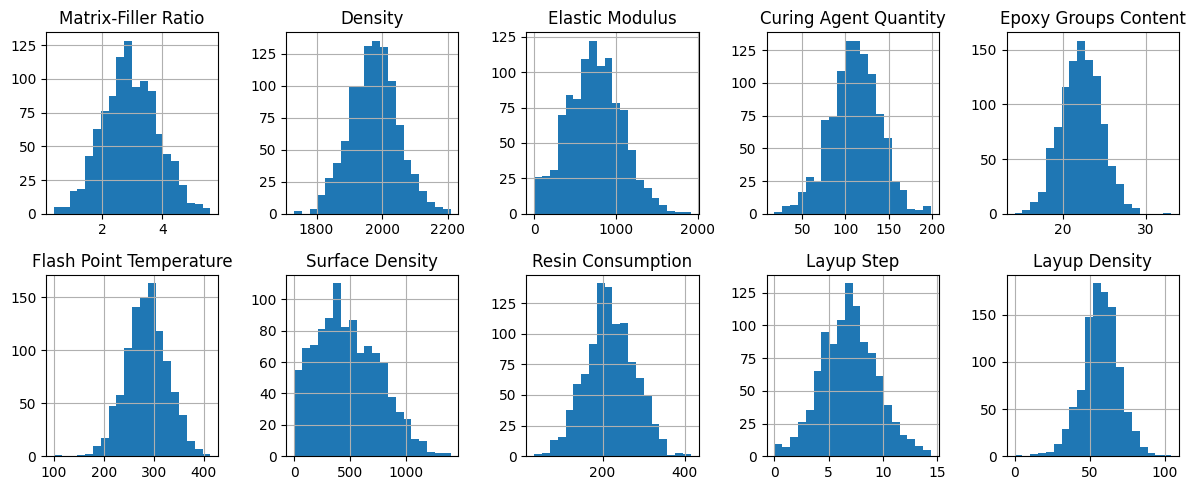

In [23]:
# Построим гистограммы
df[numerical].hist(bins=20, layout=(2, 5), figsize=(12,5))
plt.tight_layout()
plt.show()

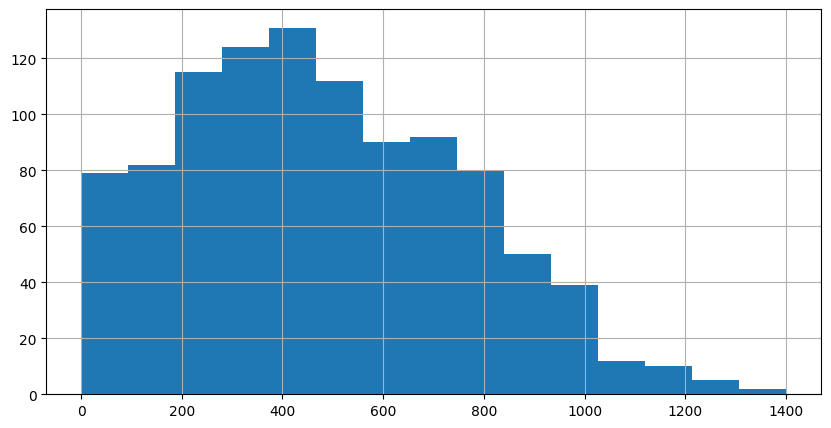

In [24]:
# Видим что для этих признаков распределение ассиметрично влево
df['Surface Density'].hist(bins=15, figsize=(10, 5));

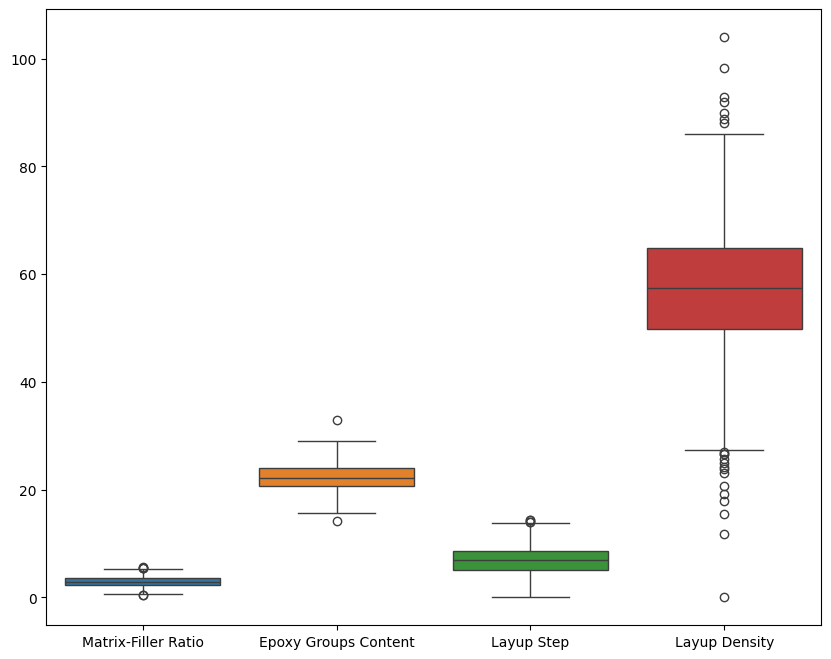

In [25]:
# Посмотрим на распределение признаков с помощью boxplots  (строим с учетом их средних для наглядности)
plt.figure(figsize = (10, 8))
sns.boxplot(data=df[['Matrix-Filler Ratio', 'Epoxy Groups Content', 'Layup Step', 'Layup Density']]);

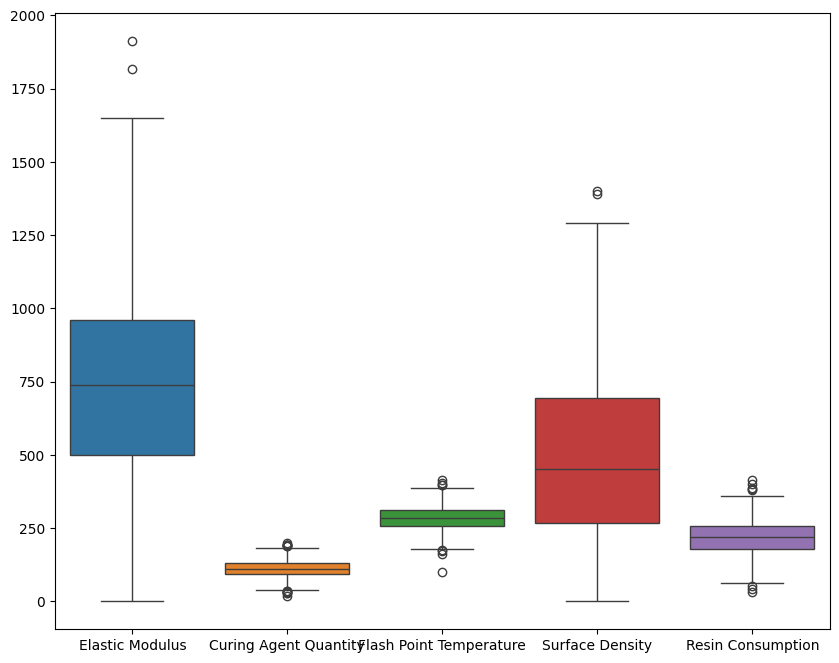

In [26]:
# Посмотрим на распределение признаков с помощью boxplots
plt.figure(figsize = (10, 8))
sns.boxplot(data=df[['Elastic Modulus',  'Curing Agent Quantity', 'Flash Point Temperature', 'Surface Density', 'Resin Consumption']]);

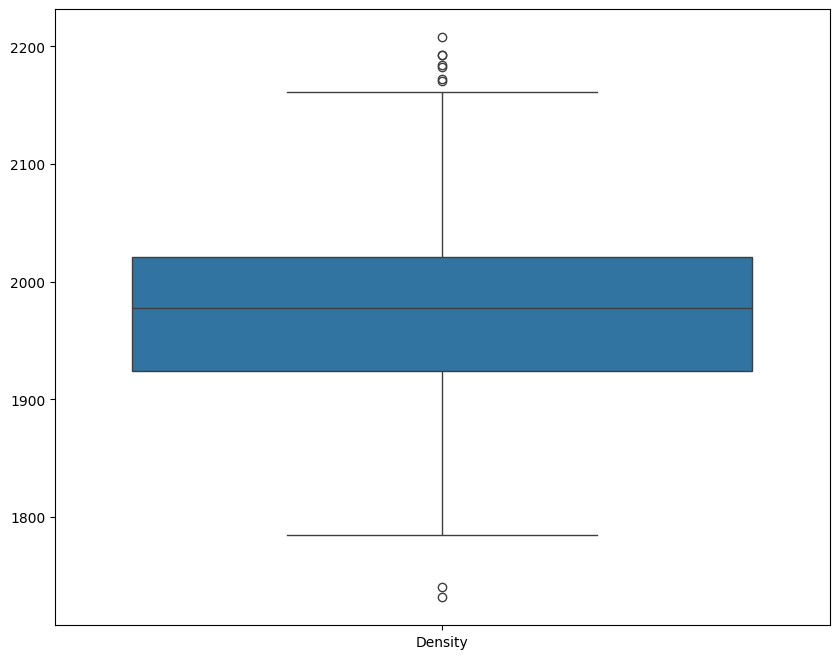

In [27]:
# Посмотрим на распределение признаков с помощью boxplots
plt.figure(figsize = (10, 8))
sns.boxplot(data=df[['Density']]);

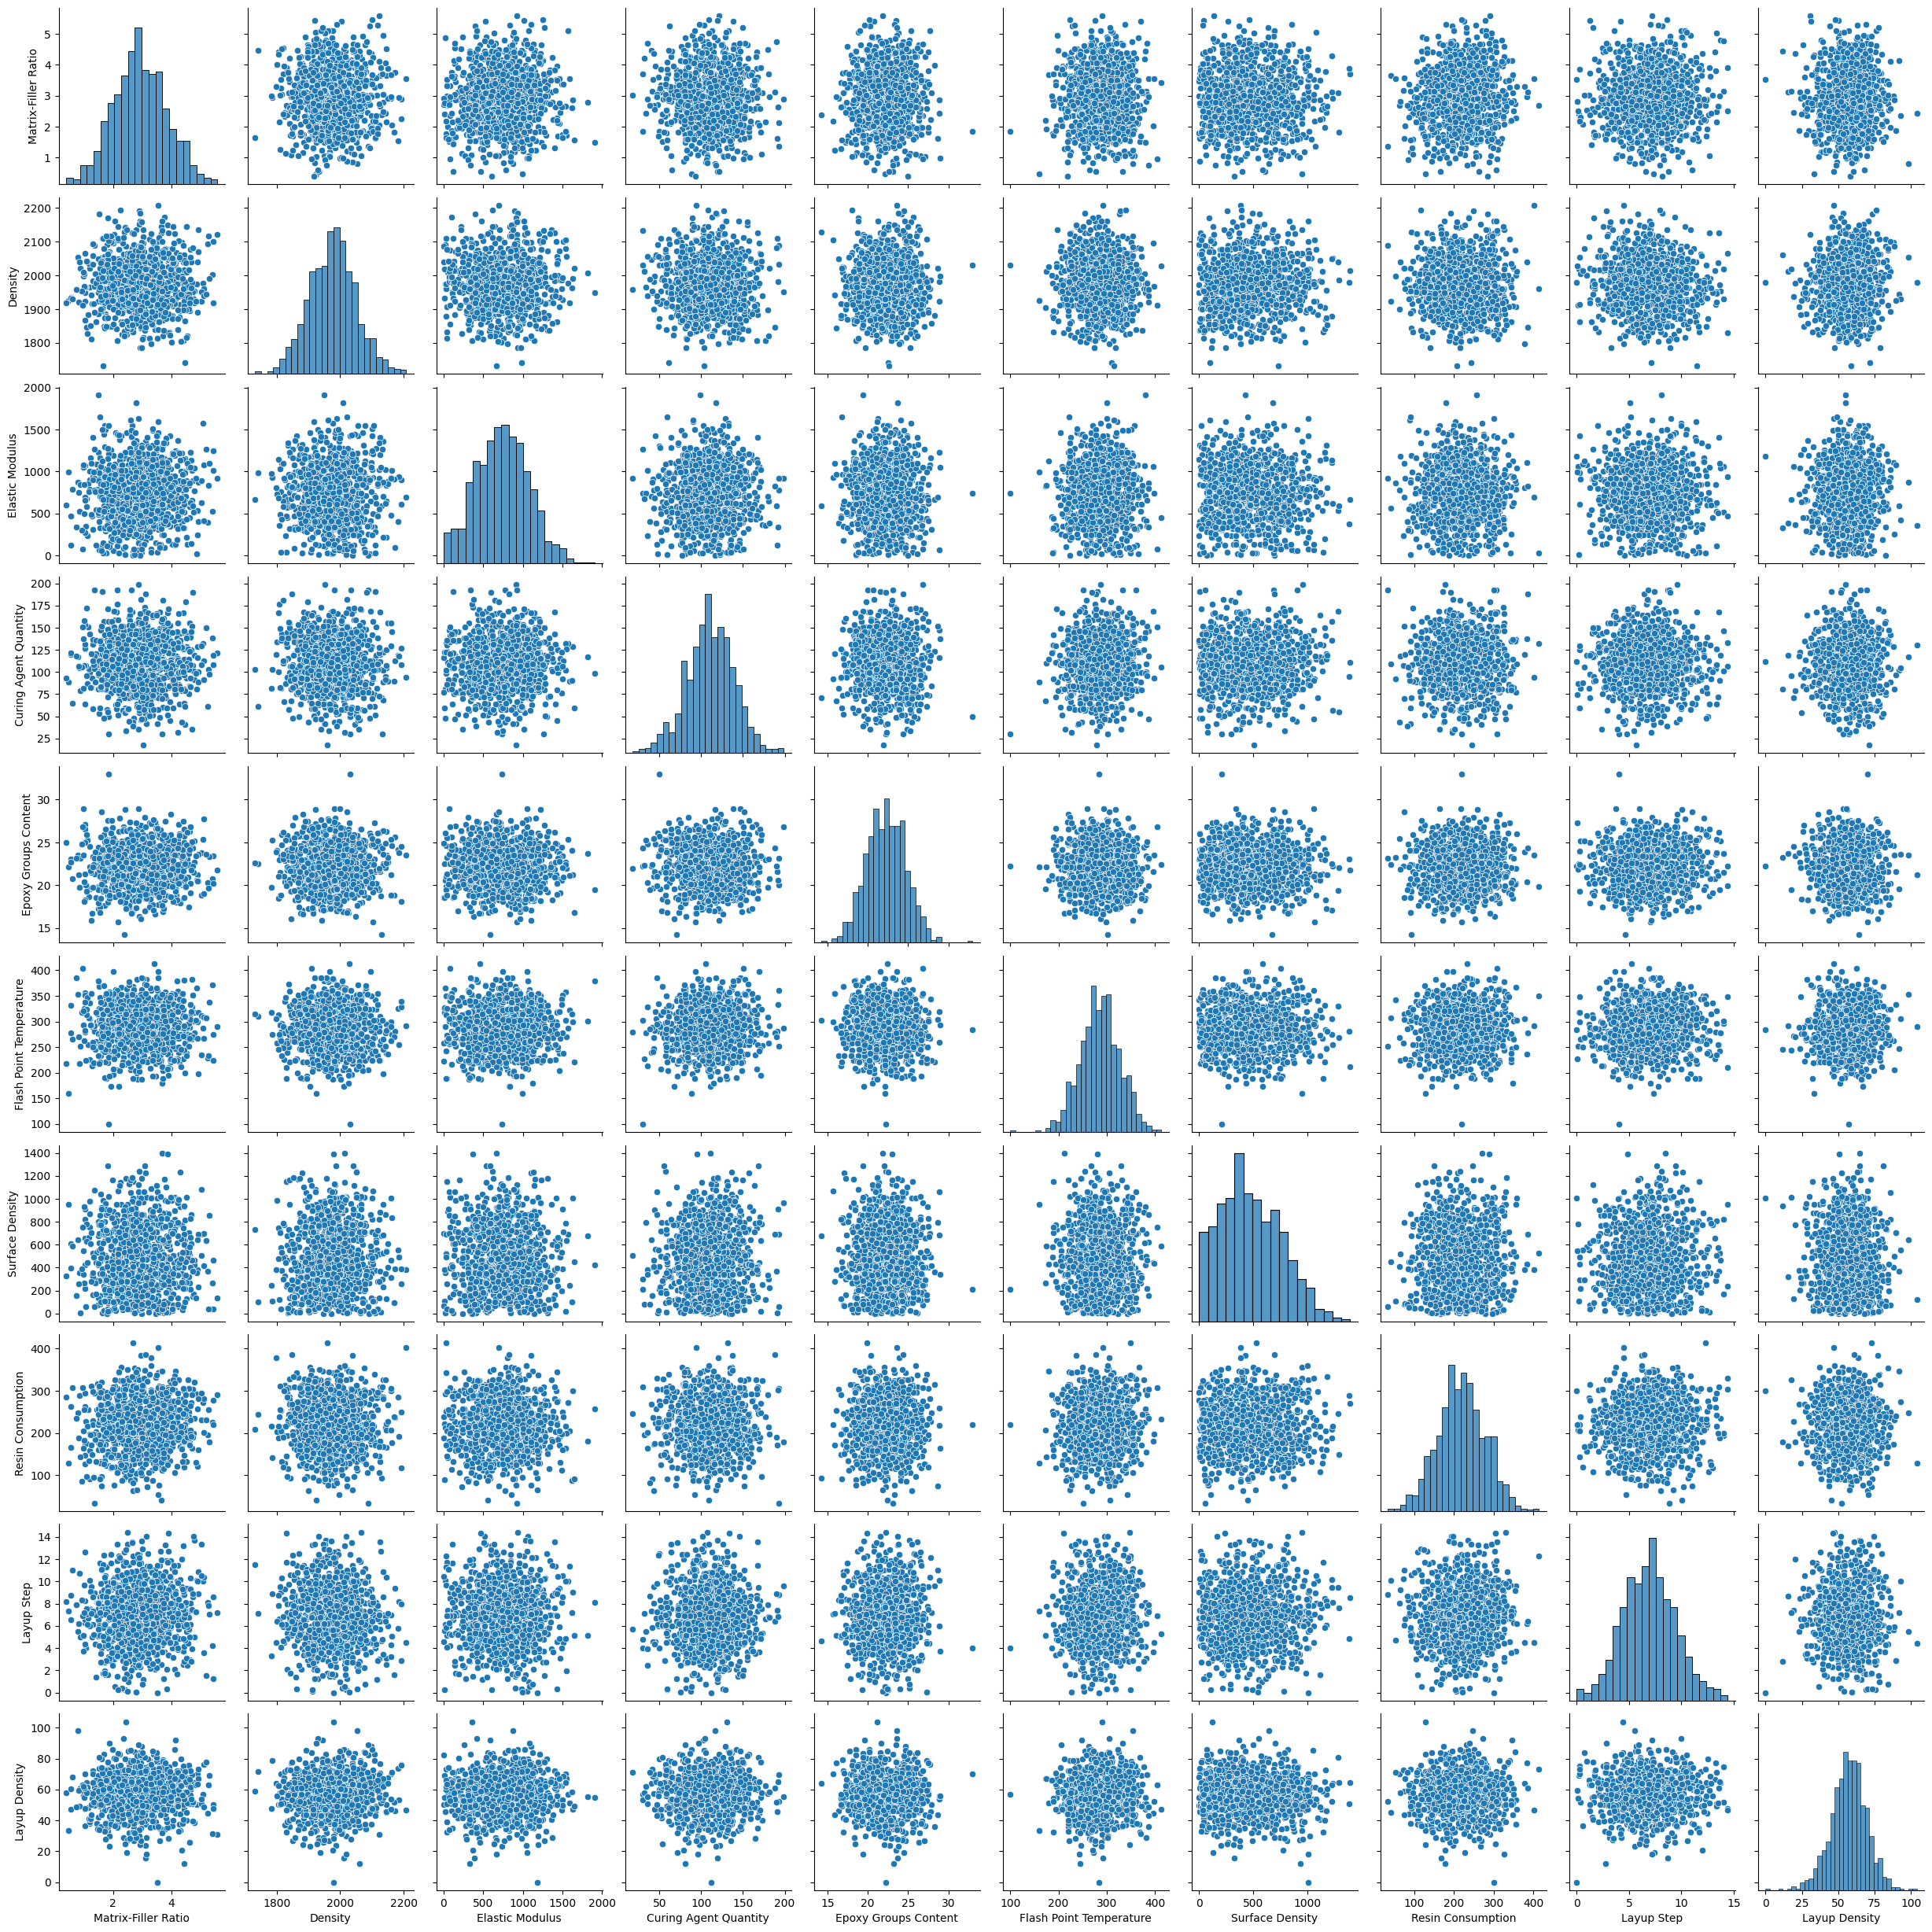

In [28]:
# построение диаграмм зависимостей пар признаков
sns.pairplot(df[numerical]);

In [29]:
# Коэффициент Пирсона показывает только линейную корреляцию
df[numerical].corr(method = 'pearson').round(2)

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Resin Consumption,Layup Step,Layup Density
Matrix-Filler Ratio,1.00,0.00,0.03,-0.01,0.02,-0.00,-0.01,0.07,0.04,-0.00
Density,0.00,1.00,-0.01,-0.04,-0.01,-0.02,0.04,-0.02,-0.06,0.08
Elastic Modulus,0.03,-0.01,1.00,0.02,-0.01,0.03,-0.01,0.00,-0.01,0.06
Curing Agent Quantity,-0.01,-0.04,0.02,1.00,-0.00,0.10,0.06,0.01,0.01,0.02
Epoxy Groups Content,0.02,-0.01,-0.01,-0.00,1.00,-0.01,-0.01,0.02,0.00,-0.04
Flash Point Temperature,-0.00,-0.02,0.03,0.10,-0.01,1.00,0.02,0.06,0.03,0.01
Surface Density,-0.01,0.04,-0.01,0.06,-0.01,0.02,1.00,0.02,0.04,-0.05
Resin Consumption,0.07,-0.02,0.00,0.01,0.02,0.06,0.02,1.00,0.01,0.01
Layup Step,0.04,-0.06,-0.01,0.01,0.00,0.03,0.04,0.01,1.00,0.00
Layup Density,-0.00,0.08,0.06,0.02,-0.04,0.01,-0.05,0.01,0.00,1.00


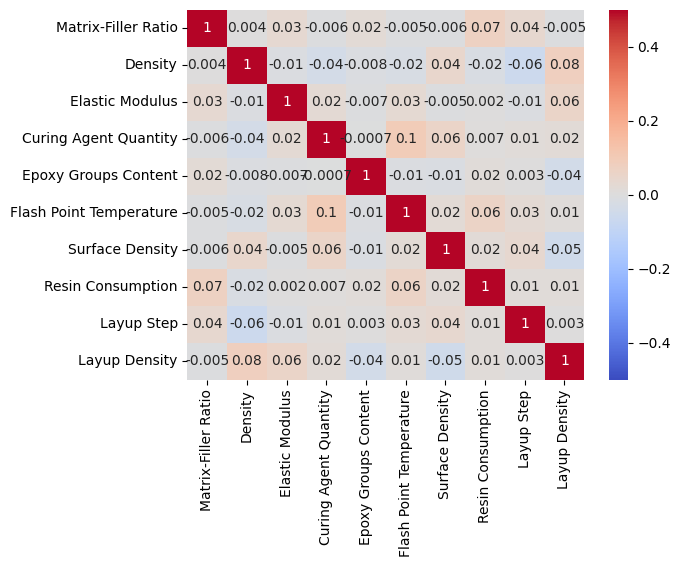

,correlation_with_target
Matrix-Filler Ratio,-0.008411
Density,-0.017602
Elastic Modulus,0.023267
Curing Agent Quantity,-0.065929
Epoxy Groups Content,0.056828
Flash Point Temperature,0.028414
Surface Density,0.036702
Resin Consumption,0.050938
Layup Step,-0.029468
Layup Density,0.006476


In [30]:
sns.heatmap(df[numerical].corr(), annot=True,fmt='.1g',vmin=-0.5, vmax=0.5, center= 0,cmap= 'coolwarm')
plt.show()

# Создание DataFrame с числовыми признаками и целевой переменной
numerical_df = df[numerical]
target_df = df['Tensile Elastic Modulus']

# Рассчет корреляции между числовыми признаками и целевой переменной
correlation = numerical_df.corrwith(target_df)

# Отображение корреляции
correlation_df = correlation.to_frame(name='correlation_with_target')
correlation_df.style.background_gradient()

In [31]:
# Создание DataFrame с числовыми признаками и целевой переменной
numerical_df = df[numerical]
target_df = df['Tensile Strength']

# Рассчет корреляции между числовыми признаками и целевой переменной
correlation = numerical_df.corrwith(target_df)

# Отображение корреляции
correlation_df = correlation.to_frame(name='correlation_with_target')
correlation_df.style.background_gradient()

,correlation_with_target
Matrix-Filler Ratio,0.024148
Density,-0.069981
Elastic Modulus,0.041868
Curing Agent Quantity,-0.075375
Epoxy Groups Content,-0.023899
Flash Point Temperature,-0.031763
Surface Density,-0.003210
Resin Consumption,0.028602
Layup Step,-0.059547
Layup Density,0.019604


In [32]:
# Количественно выбросы можно найти через стандартизированную оценку (z-оценку, z-score).
# Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего
from scipy import stats
z = stats.zscore(df[numerical])
z=pd.DataFrame(z,columns=df[numerical].columns)
z.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Resin Consumption,Layup Step,Layup Density
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.969964,0.02641,-1.131530,-0.012469
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.969964,0.02641,-1.131530,0.230546
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.969964,0.02641,-1.131530,1.040595
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.969964,0.02641,-0.741243,-0.822518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.969964,0.02641,-0.741243,-0.012469


In [33]:
# Общее количество выбросов в наборе данных
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), где хотя бы одно значение True (т.е. > 3 CKO)
numerical_df[(np.abs(z) > 3).any(axis = 1)]

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Resin Consumption,Layup Step,Layup Density
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,220.000000,4.000000,57.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,220.000000,4.000000,70.000000
19,3.532338,1980.000000,1183.000000,111.860000,22.267857,284.615385,1010.000000,300.000000,0.000000,0.000000
41,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,227.022557,7.401543,19.250533
100,3.565855,2207.773481,696.149163,94.187613,23.562885,291.803991,384.629393,402.163809,4.512825,46.775469
140,0.790499,2054.123810,876.794802,116.889391,23.564969,353.561943,643.647660,247.193190,5.506840,98.202603
211,2.696183,1959.779639,26.827000,132.031952,19.868797,349.726171,527.229431,414.590628,12.287666,73.044781
257,3.027269,1959.011062,916.441601,17.740275,21.965568,279.518623,508.912477,245.687212,5.721782,71.172863
279,4.434429,2061.918771,328.876626,81.071393,23.213218,244.874100,934.780246,178.066150,2.788476,11.740126
298,2.385109,2129.059629,589.782966,70.760954,14.254985,302.043927,676.050552,92.307158,4.650262,63.956692


In [34]:
# Выводим количество выбросов по каждому признаку
outliers_count = (np.abs(z) > 3).sum()
print(outliers_count)

Matrix-Filler Ratio        0
Density                    3
Elastic Modulus            2
Curing Agent Quantity      2
Epoxy Groups Content       2
Flash Point Temperature    3
Surface Density            2
Resin Consumption          3
Layup Step                 0
Layup Density              7
dtype: int64


In [35]:
# так как физическую природу выбросов понять трудно, то пока их не удаляем. 
# К тому же мы видим что процент выбросов очень маленький
# Если при обучении модели будут проблемы то вернемся


# Создаем булеву маску для строк с выбросами
#outliers_mask =(np.abs(z) > 3).any(axis=1)

# Удаляем строки с выбросами из DataFrame df
# df_without_outliers = df[~outlier_mask]


# ВЫБРОСЫ удаляем

###### 1.4 Работаем с целевыми  признаками

In [36]:
target=['Tensile Elastic Modulus','Tensile Strength']

In [37]:
# Показывает статистическую сводку каждого столбца  а также границу каждого квартиля - 25%, 50% и 75%
df[target].describe()

,Tensile Elastic Modulus,Tensile Strength
count,1023.000000,1023.000000
mean,73.328571,2466.922843
std,3.118983,485.628006
min,64.054061,1036.856605
25%,71.245018,2135.850448
50%,73.268805,2459.524526
75%,75.356612,2767.193119
max,82.682051,3848.436732


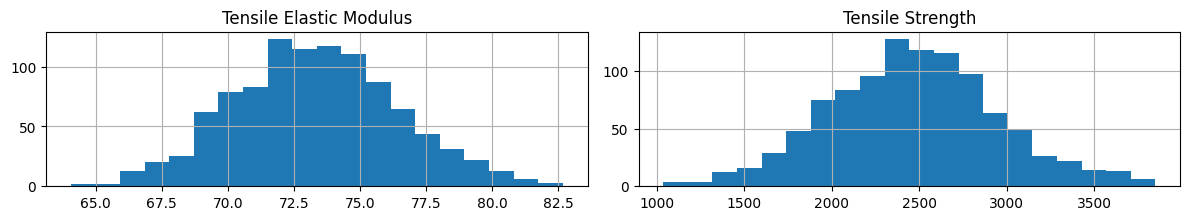

In [38]:
# Построим гистограммы
df[target].hist(bins=20, layout=(2, 2), figsize=(12,4))
plt.tight_layout()
plt.show()

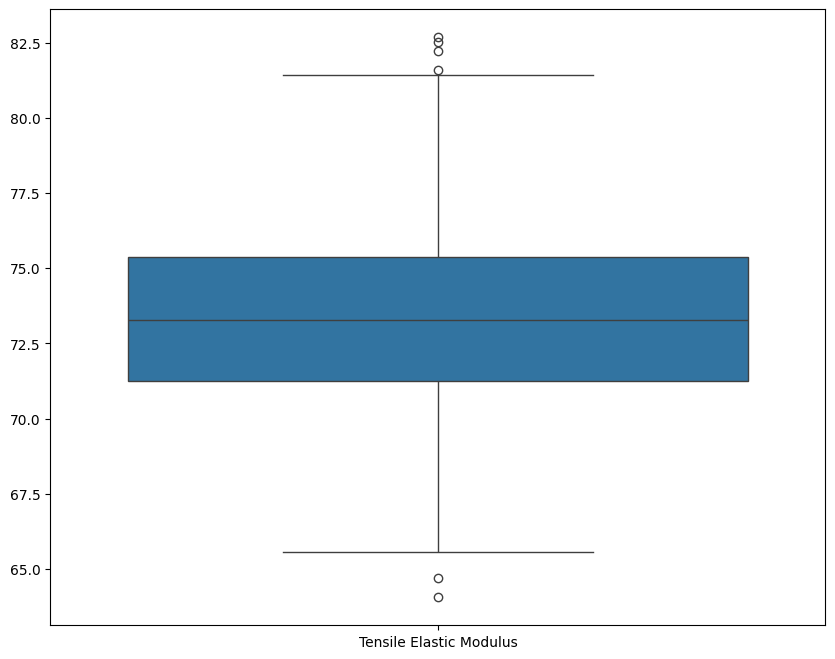

In [39]:
# Посмотрим на распределение признаков с помощью boxplots
plt.figure(figsize = (10, 8))
sns.boxplot(data=df[['Tensile Elastic Modulus']]);

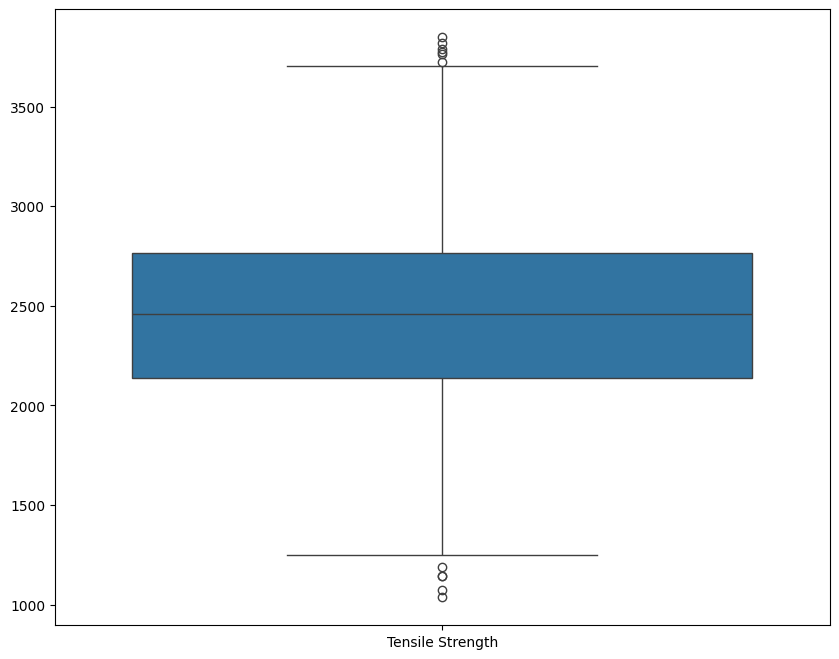

In [40]:
# Посмотрим на распределение признаков с помощью boxplots
plt.figure(figsize = (10, 8))
sns.boxplot(data=df[['Tensile Strength']]);

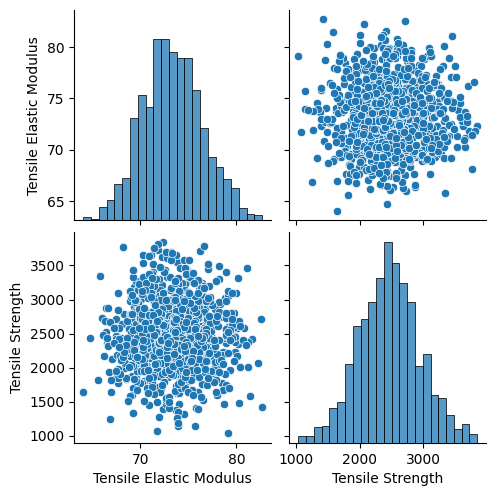

In [41]:
# построение диаграмм зависимостей пар признаков
sns.pairplot(df[target]);

In [42]:
# Коэффициент Пирсона показывает только линейную корреляцию
df[target].corr(method = 'pearson').round(2)

,Tensile Elastic Modulus,Tensile Strength
Tensile Elastic Modulus,1.00,-0.01
Tensile Strength,-0.01,1.00


In [43]:
# Количественно выбросы можно найти через стандартизированную оценку (z-оценку, z-score).
# Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего
from scipy import stats
z = stats.zscore(df[target])
z=pd.DataFrame(z,columns=df[target].columns)
z.head()

,Tensile Elastic Modulus,Tensile Strength
0,-1.06772,1.098244
1,-1.06772,1.098244
2,-1.06772,1.098244
3,-1.06772,1.098244
4,-1.06772,1.098244


In [44]:
# Подсчет числа выбросов в каждом столбце
outliers_count = (np.abs(z) > 3).sum(axis=0)
print(outliers_count)

Tensile Elastic Modulus    1
Tensile Strength           0
dtype: int64


In [45]:
# Общее количество выбросов в наборе данных
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), где хотя бы одно значение True (т.е. > 3)
df[(np.abs(z[target]) > 3).any(axis = 1)]

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Angle,Layup Step,Layup Density
375,2.106888,1914.089369,963.748397,58.710809,23.813708,278.61224,793.402805,82.682051,1422.975753,283.239742,0,6.776888,49.697311


#### 1.5 Работаем с категориальным признаком

In [46]:
nominal=['Layup Angle']
df['Layup Angle'].value_counts() 
#nominal_df = df[nominal]
#nominal_df

Layup Angle
0     520
90    503
Name: count, dtype: int64

In [47]:
#nominal_df.columns

In [48]:
# Распределение переменной по количеству
#nominal_df.value_counts()   #value_counts(normalize=True) - в процентах

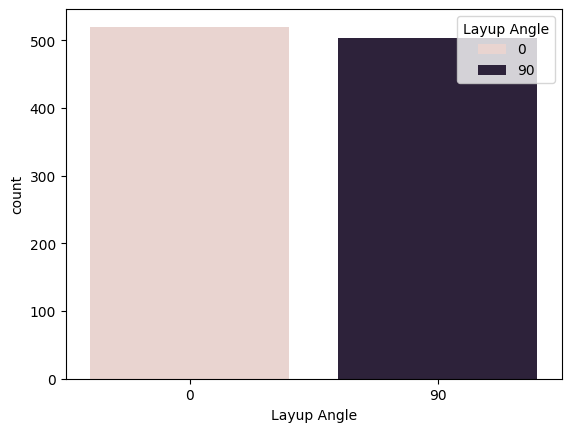

In [49]:
# Отображение категориальной переменной
sns.countplot(x='Layup Angle' , data=df, hue='Layup Angle');

In [50]:
#df

In [51]:
# Преобразование "Layup Angle" методом one-hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import category_encoders as ce
 # в параметр cols передадим столбцы, которые нужно преобразовать
#ohe_encoder = ce.OneHotEncoder(cols = ['Layup Angle'])
# в метод .fit_transform() мы передадим весь датафрейм целиком
#df = ohe_encoder.fit_transform(df)
#df
df = pd.get_dummies(df, columns=['Layup Angle'], prefix='Layup').astype(float)#,dtype=float)
#dict={'False':0, 'True':1}
#X['Layup Angle'] = X['Layup Angle'].apply(lambda x:dict[x])
#print(X['Layup Angle'])
#df = pd.get_dummies(df, columns=nominal_df,drop_first=True)     #prefix='Layup')
#dummies_list=[pd.get_dummies(df[col],prefix=col,drop_first=True) for col in nominal_df.columns]
#dummies=pd.concat(dummies_list,axis=1)
#df=pd.concat([dummies_list,dummies],axis=1)
df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,4.000000,57.000000,1.0,0.0
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,4.000000,60.000000,1.0,0.0
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,4.000000,70.000000,1.0,0.0
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,5.000000,47.000000,1.0,0.0
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,5.000000,57.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,9.076380,47.019770,0.0,1.0
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,10.565614,53.750790,0.0,1.0
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,4.161154,67.629684,0.0,1.0
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,6.313201,58.261074,0.0,1.0


In [52]:
#pip install category_encoders

In [53]:
#  Сохраняем набор данных после первичных преобразований
df.to_csv('composit.csv',encoding='utf8', index=False)

In [54]:
# Загрузка DataFrame из сохраненного CSV-файла
df = pd.read_csv('composit.csv')
df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,4.000000,57.000000,1.0,0.0
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,4.000000,60.000000,1.0,0.0
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,4.000000,70.000000,1.0,0.0
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,5.000000,47.000000,1.0,0.0
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,5.000000,57.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,9.076380,47.019770,0.0,1.0
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,10.565614,53.750790,0.0,1.0
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,4.161154,67.629684,0.0,1.0
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,6.313201,58.261074,0.0,1.0


####**2. Предобработка данных**


2.1 Преобразование данных для стабилизации дисперсии

In [55]:
# Смотрим статистику для нашего скошенного признака
df['Surface Density'].describe()

count    1023.000000
mean      482.731833
std       281.314690
min         0.603740
25%       266.816645
50%       451.864365
75%       693.225017
max      1399.542362
Name: Surface Density, dtype: float64

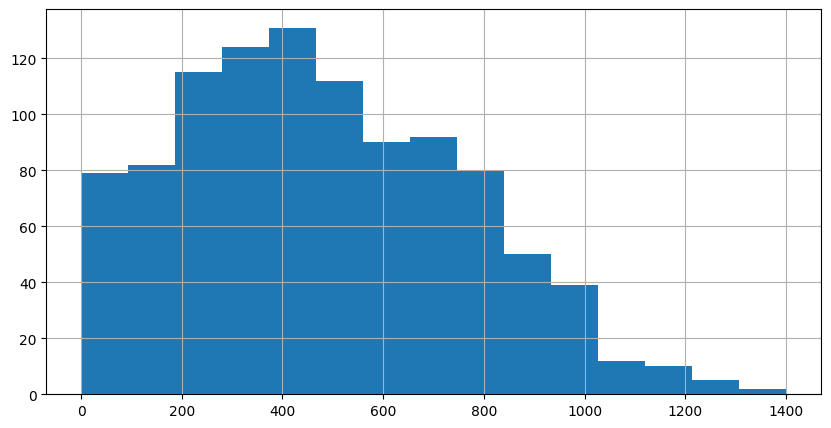

In [56]:
# Смотрим гитограмму для нашего скошенного признака
df['Surface Density'].hist(bins=15, figsize=(10, 5));

In [57]:
# Проводим преобразование Бокса-Кокса
from scipy.stats import boxcox

# Преобразование Box-Cox
df['Surface Density_boxcox'], _ = boxcox(df['Surface Density'] + 1)

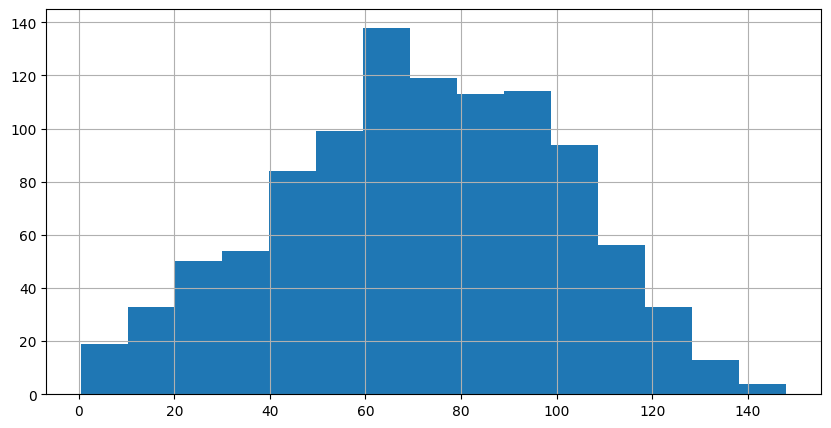

In [58]:
# Смотрим на результат
df['Surface Density_boxcox'].hist(bins=15, figsize=(10, 5));

In [59]:
# Смотрим на результат
df['Surface Density_boxcox'].describe()

count    1023.000000
mean       71.609029
std        29.523773
min         0.549691
25%        51.431321
50%        72.104821
75%        94.730981
max       147.947801
Name: Surface Density_boxcox, dtype: float64

In [60]:
df.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,4.0,57.0,1.0,0.0,44.070787
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,4.0,60.0,1.0,0.0,44.070787
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,4.0,70.0,1.0,0.0,44.070787
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,5.0,47.0,1.0,0.0,44.070787
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,5.0,57.0,1.0,0.0,44.070787


In [61]:
# Удаляем из датафрейма ненужный столбец
df = df.drop('Surface Density', axis=1)

In [62]:
df.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,70.0,3000.0,220.0,4.0,57.0,1.0,0.0,44.070787
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,70.0,3000.0,220.0,4.0,60.0,1.0,0.0,44.070787
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,70.0,3000.0,220.0,4.0,70.0,1.0,0.0,44.070787
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,70.0,3000.0,220.0,5.0,47.0,1.0,0.0,44.070787
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,70.0,3000.0,220.0,5.0,57.0,1.0,0.0,44.070787


In [63]:
#  Сохраняем набор данных после  преобразований
df.to_csv('composit_boxcox.csv',encoding='utf8', index=False)

#### 2.2 Стандартизация данных

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Создание экземпляра StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

In [65]:
numerical = ['Matrix-Filler Ratio', 'Density', 'Elastic Modulus',\
             'Curing Agent Quantity', 'Epoxy Groups Content','Flash Point Temperature',\
             'Tensile Elastic Modulus', 'Tensile Strength',\
             'Surface Density_boxcox', 'Resin Consumption', 'Layup Step', 'Layup Density']

In [66]:
# Применение стандартизации к выбранным признакам (numerical)
df[numerical] = scaler.fit_transform(df[numerical])

In [67]:
#  Сохраняем набор данных после первичных преобразований
df.to_csv('composit_stand.csv', index=False)

In [68]:
# Загрузка DataFrame из сохраненного CSV-файла
df = pd.read_csv('composit_stand.csv')
df.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-1.06772,1.098244,0.02641,-1.131530,-0.012469,1.0,0.0,-0.933204
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-1.06772,1.098244,0.02641,-1.131530,0.230546,1.0,0.0,-0.933204
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-1.06772,1.098244,0.02641,-1.131530,1.040595,1.0,0.0,-0.933204
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-1.06772,1.098244,0.02641,-0.741243,-0.822518,1.0,0.0,-0.933204
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-1.06772,1.098244,0.02641,-0.741243,-0.012469,1.0,0.0,-0.933204


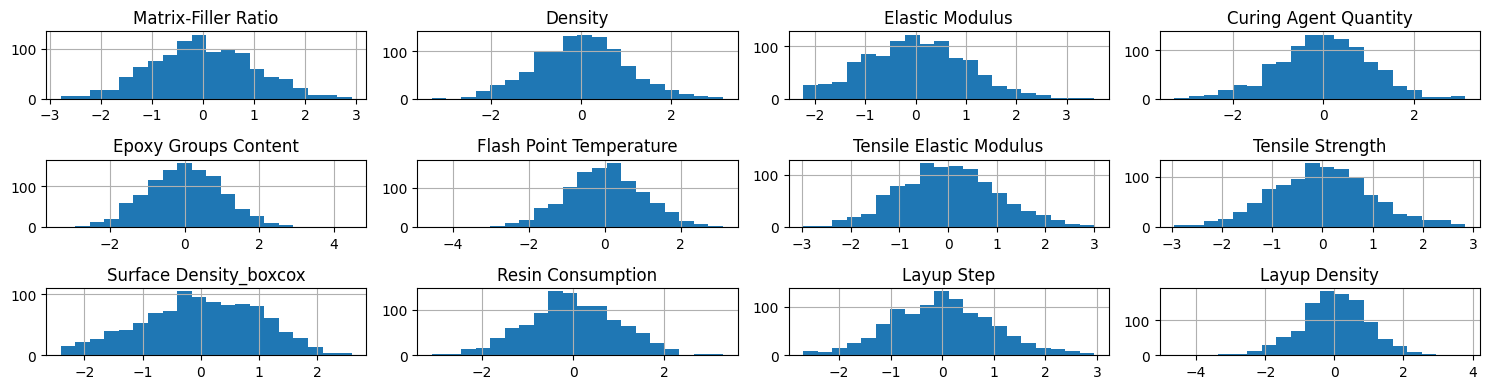

In [69]:
# Построим гистограммы
df[numerical].hist(bins=20, layout=(3, 4), figsize=(15,4))
plt.tight_layout()
plt.show()

In [70]:
# Показывает статистическую сводку каждого столбца  а также границу каждого квартиля - 25%, 50% и 75%
df[numerical].describe()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
count,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03
mean,-2.778271e-17,8.612639e-16,3.264468e-16,-5.903825e-17,-4.514690e-17,4.601511e-16,-1.076580e-16,7.883343e-16,2.743542e-16,-2.778271e-16,-3.229740e-16,9.723948e-17
std,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00
min,-2.783776e+00,-3.310622e+00,-2.234332e+00,-3.282308e+00,-3.321825e+00,-4.542215e+00,-2.975023e+00,-2.946217e+00,-2.408029e+00,-3.092116e+00,-2.692680e+00,-4.629749e+00
25%,-6.710072e-01,-6.999212e-01,-7.267418e-01,-6.409455e-01,-6.803619e-01,-6.552663e-01,-6.683499e-01,-6.820742e-01,-6.837736e-01,-6.497697e-01,-7.100068e-01,-5.957682e-01
50%,-2.573263e-02,2.560303e-02,-7.843941e-04,-2.096293e-04,-5.673631e-03,3.582556e-04,-1.917160e-02,-1.524199e-02,1.680118e-02,1.299248e-02,6.604358e-03,1.522815e-02
75%,6.817601e-01,6.193176e-01,6.722489e-01,6.774466e-01,7.141185e-01,6.627029e-01,6.505431e-01,6.186158e-01,7.835469e-01,6.541739e-01,6.584426e-01,6.311118e-01
max,2.915695e+00,3.148712e+00,3.549589e+00,3.125033e+00,4.471955e+00,3.112932e+00,3.000355e+00,2.846190e+00,2.586936e+00,3.285517e+00,2.943275e+00,3.793863e+00
